<a href="https://colab.research.google.com/github/Stelath/pytorch-learning/blob/main/Pytorch_Learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets

In [ ]:
train = datasets.MNIST("", train=True, download=True,
                       transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

Import Data

In [ ]:
trainset = torch.utils.data.DataLoader(train, batch_size=8, shuffle=True)
testset = torch.utils.data.DataLoader(train, batch_size=8, shuffle=True)

In [ ]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

View one of the images

In [ ]:
x, y = data[0][0], data[1][0]
print(y)

tensor(9)


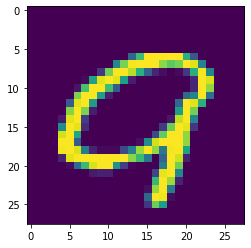

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28, 28))
plt.show()

Confirm Datasets Balenced

In [ ]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
  xs, ys = data
  for y in ys:
    counter_dict[int(y)] += 1
    total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:
for i in counter_dict:
  print(f'{i}: {counter_dict[i] / total * 100}')

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


Build Neural Network

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)
  
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
X = torch.rand((28,28))
X = X.view(-1, 28*28)

In [ ]:
output = net(X)
output


tensor([[-2.2474, -2.3667, -2.4333, -2.1659, -2.2712, -2.2810, -2.4609, -2.1488,
         -2.4071, -2.2955]], grad_fn=<LogSoftmaxBackward0>)

Training / Optimization

In [ ]:
import torch.optim as optim

# Create a new optimizer with a set of paramaters to optimize + a learning rate (look into decaying learning rate later)
optimizer = optim.Adam(net.parameters(), lr=0.001) #1e-3

# Make 3 whole passes through the data
EPOCHS = 3

for epoch in range(EPOCHS):
  for data in trainset:
    # Data is a batch of featuresets and labels
    X, y = data
    # Zero the gradient so that the batches dont get added together (could not be zerod if training on weak machine to get benifits of batch training)
    net.zero_grad()
    output = net(X.view(-1, 28 * 28))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()
  print(loss)

tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.0091, grad_fn=<NllLossBackward0>)
tensor(0.0148, grad_fn=<NllLossBackward0>)


In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in trainset:
    X, y = data
    output = net(X.view(-1, 28 * 28))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1

print('Accuracy', round(correct / total, 3))

Accuracy 0.976


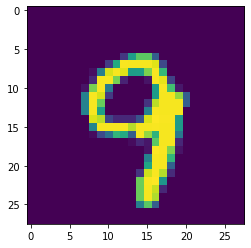

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[7].view(28, 28))
plt.show()

In [ ]:
print('Model Guess:', torch.argmax(net(X[7].view(-1, 784))[0]))
print('Answer:', y[7])

Model Guess: tensor(10)
Answer: tensor(9)
